In [1]:
import gmplot
import pandas as pd
import requests 
import os
import math
from xml.etree.ElementTree import fromstring, ElementTree
from datetime import datetime
import json
import statistics 
from collections import Counter
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TrafficEvents = None

chunk_size = 1000

BASE_PATH = "/home/amin/CETI/RoadConstruction/TrafficEventData/part/road_closure/"
    
index_folder = 0
index_start_point_file = 0
index_end_point_file = 411

In [3]:
def read_data(path):
    data = None
    data = pd.read_csv(path)
    return data

In [4]:
def read_part_data(folder_id, index_start, index_end):
    df = None
    print("start time is {}".format(datetime.now()))
    for i in range(index_start, index_end):
        type_of_ways_all_points = []
        path = BASE_PATH + str(folder_id) + "/" + str(i) + "_file_"+ str(i) + ".csv"

        data = read_data(path)
        df = data.append(df, ignore_index = True)
    
    print("end time is {}".format(datetime.now()))
    return df

In [5]:
df = None
for i in range(0,9):
    print(i)
    data = read_part_data(i, 0, 411)
    df = data.append(df, ignore_index = True)
    print(df.head())
print(9)
data = read_part_data(9, 0, 393)
df = data.append(df, ignore_index = True)

0
start time is 2020-09-25 19:15:33.265616
end time is 2020-09-25 19:17:03.270742
         Id Source          Type  EventCode  Severity  StartPoint_Lat  \
0  B-885271   Bing  Construction        NaN         3       34.202210   
1  B-885284   Bing  Construction        NaN         2       34.256740   
2  B-885285   Bing  Construction        NaN         2       32.706000   
3  B-885286   Bing  Construction        NaN         2       36.240676   
4  B-885287   Bing  Construction        NaN         4       47.601720   

   StartPoint_Lng  EndPoint_Lat  EndPoint_Lng  Distance(mi)  ...  \
0     -118.340310     34.183742   -118.315969      1.887693  ...   
1     -116.883010     34.243680   -116.911115      1.841381  ...   
2     -116.364420     32.675240   -116.286410      5.009399  ...   
3     -115.054237     36.203095   -115.118437      4.421320  ...   
4     -122.326410     47.601720   -122.329984      0.166507  ...   

                         nearst_nodes_of_start_point  \
0  {'waypoints

end time is 2020-09-25 19:21:32.117326
          Id Source          Type  EventCode  Severity  StartPoint_Lat  \
0  B-3262550   Bing  Construction        NaN         4        39.96128   
1  B-3262551   Bing  Construction        NaN         2        40.15967   
2  B-3262552   Bing  Construction        NaN         2        39.77337   
3  B-3262553   Bing  Construction        NaN         2        40.61473   
4  B-3262555   Bing  Construction        NaN         2        40.43630   

   StartPoint_Lng  EndPoint_Lat  EndPoint_Lng  Distance(mi)  ...  \
0       -75.18244      39.94888     -75.18549      0.871854  ...   
1       -75.47587      40.19527     -75.52474      3.564557  ...   
2       -76.66837      39.76857     -76.66679      0.342098  ...   
3       -75.57678      40.61574     -75.57873      0.123814  ...   
4       -80.00093      40.43381     -79.98960      0.620184  ...   

                         nearst_nodes_of_start_point  \
0  {'waypoints': [{'nodes': [344170146, 109916157..

end time is 2020-09-25 19:26:13.712274
          Id Source          Type  EventCode  Severity  StartPoint_Lat  \
0  B-8424010   Bing  Construction        NaN         4       32.763540   
1  B-8424011   Bing  Construction        NaN         4       32.763315   
2  B-8424012   Bing  Construction        NaN         2       34.048376   
3  B-8424026   Bing  Construction        NaN         2       34.163796   
4  B-8424027   Bing  Construction        NaN         2       34.163460   

   StartPoint_Lng  EndPoint_Lat  EndPoint_Lng  Distance(mi)  ...  \
0     -117.209690     32.763315   -117.195782      0.808225  ...   
1     -117.195782     32.763540   -117.209690      0.808225  ...   
2     -118.238120     34.053681   -118.237940      0.366685  ...   
3     -118.298234     34.163460   -118.297780      0.034823  ...   
4     -118.297780     34.163796   -118.298234      0.034823  ...   

                         nearst_nodes_of_start_point  \
0  {'waypoints': [{'nodes': [940146735, 940146660..

end time is 2020-09-25 19:31:10.885472


In [6]:
df.head(10)

,Id,Source,Type,EventCode,Severity,StartPoint_Lat,StartPoint_Lng,EndPoint_Lat,EndPoint_Lng,Distance(mi),...,nearst_nodes_of_start_point,nearst_nodes_of_end_point,nearst_nodes_ids_of_start_point,nearst_nodes_ids_of_end_point,type_of_roads,avg_speed,distance,eta,road_closure,lane_closure
0,M-29450881,MapQuest,Construction,406.0,3,44.309494,-90.840271,NaN,NaN,0.86,...,"{'waypoints': [{'nodes': [2147408021, 47184371...","{'waypoints': [{'nodes': [2147408021, 47184371...","[2147408021, 471843710, 2147408024, 2147408021...","[2147408021, 471843710, 2147408024, 2147408021...",motorway_link,-100.0,-100.0,-100.0,False,False
1,M-29450890,MapQuest,Construction,703.0,2,44.387669,-88.720055,NaN,NaN,0.12,...,"{'waypoints': [{'nodes': [232006634, 232006479...","{'waypoints': [{'nodes': [232006634, 232006479...","[232006634, 232006479, 2281677742, 232006634, ...","[232006634, 232006479, 2281677742, 232006634, ...",trunk,-100.0,-100.0,-100.0,False,False
2,M-29450891,MapQuest,Construction,703.0,2,44.403862,-88.734856,NaN,NaN,0.00,...,"{'waypoints': [{'nodes': [232006387, 232006382...","{'waypoints': [{'nodes': [232006387, 232006382...","[232006387, 232006382, 232006382, 231764181, 2...","[232006387, 232006382, 232006382, 231764181, 2...",trunk,-100.0,-100.0,-100.0,False,False
3,M-29450947,MapQuest,Construction,735.0,3,44.734169,-90.497337,NaN,NaN,0.10,...,"{'waypoints': [{'nodes': [147039746, 147017038...","{'waypoints': [{'nodes': [147039746, 147017038...","[147039746, 147017038, 147017038, 147017035, 1...","[147039746, 147017038, 147017038, 147017035, 1...",residential,-100.0,-100.0,-100.0,True,False
4,M-29450948,MapQuest,Construction,735.0,3,44.734177,-90.496017,NaN,NaN,0.10,...,"{'waypoints': [{'nodes': [3372527386, 14701703...","{'waypoints': [{'nodes': [3372527386, 14701703...","[3372527386, 147017032, 3372527390, 147017032,...","[3372527386, 147017032, 3372527390, 147017032,...",primary,-100.0,-100.0,-100.0,True,False
5,M-29452018,MapQuest,Construction,641.0,2,43.074471,-88.066605,NaN,NaN,0.00,...,"{'waypoints': [{'nodes': [0, 196651378], 'hint...","{'waypoints': [{'nodes': [0, 196651378], 'hint...","[0, 196651378, 0, 233349076, 0, 196651380, 0, ...","[0, 196651378, 0, 233349076, 0, 196651380, 0, ...",None,-100.0,-100.0,-100.0,False,True
6,M-29452119,MapQuest,Construction,701.0,2,42.353142,-87.977654,NaN,NaN,0.00,...,"{'waypoints': [{'nodes': [235603291, 235603296...","{'waypoints': [{'nodes': [235603291, 235603296...","[235603291, 235603296, 235603291, 235587571, 7...","[235603291, 235603296, 235603291, 235587571, 7...",secondary,-100.0,-100.0,-100.0,False,True
7,M-29452120,MapQuest,Construction,701.0,2,42.385311,-87.963326,NaN,NaN,0.00,...,"{'waypoints': [{'nodes': [1514677298, 23544272...","{'waypoints': [{'nodes': [1514677298, 23544272...","[1514677298, 235442729, 0, 1514677298, 1514677...","[1514677298, 235442729, 0, 1514677298, 1514677...",primary,-100.0,-100.0,-100.0,False,True
8,M-29452121,MapQuest,Construction,500.0,2,42.346806,-87.902145,NaN,NaN,0.00,...,"{'waypoints': [{'nodes': [235210040, 181946597...","{'waypoints': [{'nodes': [235210040, 181946597...","[235210040, 1819465977, 726669678, 726669806, ...","[235210040, 1819465977, 726669678, 726669806, ...",trunk_link,-100.0,-100.0,-100.0,False,True
9,M-29452122,MapQuest,Construction,701.0,2,42.716621,-88.225945,NaN,NaN,0.00,...,"{'waypoints': [{'nodes': [992846309, 473621036...","{'waypoints': [{'nodes': [992846309, 473621036...","[992846309, 4736210361, 1073297157, 1102350902...","[992846309, 4736210361, 1073297157, 1102350902...",trunk,-100.0,-100.0,-100.0,False,True


In [7]:
df.shape

(2046000, 68)

In [8]:
df_city_state_close_group = df.groupby(["City", "State", "road_closure", "lane_closure"])

In [9]:
df_city_state_close_group_count = df_city_state_close_group.size().reset_index(name='counts')

In [10]:
df_city_state_close_group_count.head()

,City,State,road_closure,lane_closure,counts
0,Aaronsburg,PA,False,False,4
1,Aaronsburg,PA,False,True,2
2,Abbeville,AL,False,False,1
3,Abbeville,AL,False,True,6
4,Abbeville,GA,False,True,4


In [11]:
df_state_close_group = df.groupby(["State", "road_closure", "lane_closure"])

In [12]:
df_state_close_group_count = df_state_close_group.size().reset_index(name='counts')

In [13]:
df_state_close_group_count.head()

,State,road_closure,lane_closure,counts
0,AL,False,False,3491
1,AL,False,True,3157
2,AL,True,False,2274
3,AR,False,False,1100
4,AR,False,True,1187


In [15]:
df_state_close_group_count_no_lock_road = df_state_close_group_count[df_state_close_group_count.road_closure == False]

In [17]:
df_state_close_group_count_no_lock_road.head()

,State,road_closure,lane_closure,counts
0,AL,False,False,3491
1,AL,False,True,3157
3,AR,False,False,1100
4,AR,False,True,1187
6,AZ,False,False,16671


In [18]:
df_state_close_group_count_no_lock_road_no_lane = df_state_close_group_count_no_lock_road[df_state_close_group_count_no_lock_road.lane_closure == False]

In [19]:
df_state_close_group_count_no_lock_road_no_lane.head()

,State,road_closure,lane_closure,counts
0,AL,False,False,3491
3,AR,False,False,1100
6,AZ,False,False,16671
9,CA,False,False,150555
12,CO,False,False,76787


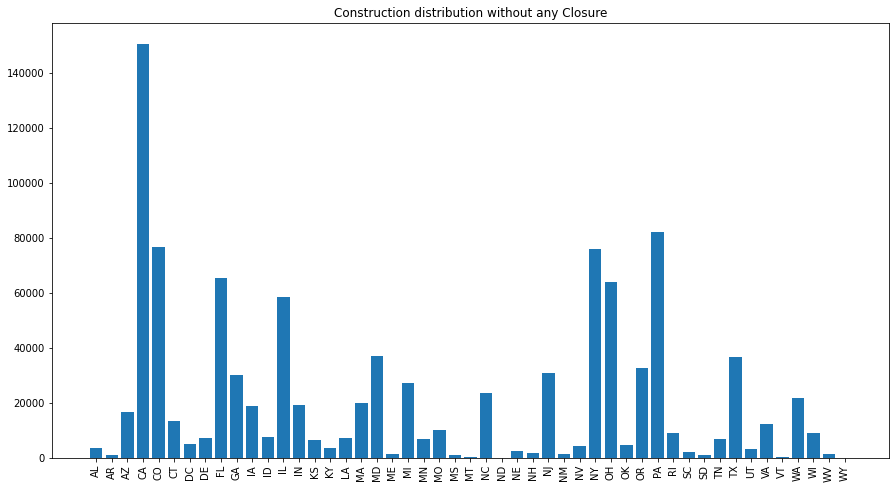

In [21]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_close_group_count_no_lock_road_no_lane['State'], height=df_state_close_group_count_no_lock_road_no_lane['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution without any Closure")
plt.savefig("Construction-distribution-without-any-Closure.png")

In [55]:
df_state_close_group_count_no_lock_road_with_lane = df_state_close_group_count_no_lock_road[df_state_close_group_count_no_lock_road.lane_closure == True]

In [56]:
df_state_close_group_count_no_lock_road_with_lane.head()

,State,road_closure,lane_closure,counts
1,AL,False,True,3157
4,AR,False,True,1187
7,AZ,False,True,5747
10,CA,False,True,72688
13,CO,False,True,20340


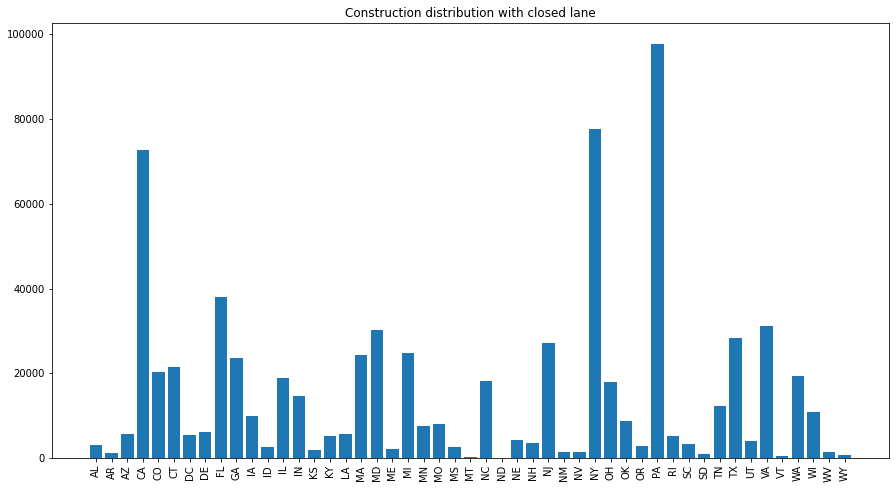

In [57]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_close_group_count_no_lock_road_with_lane['State'], height=df_state_close_group_count_no_lock_road_with_lane['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution with closed lane")
plt.savefig("Construction-distribution-with-closed-lane.png")

In [58]:
df_state_close_group_count_with_lock_road = df_state_close_group_count[df_state_close_group_count.road_closure == True]

In [59]:
df_state_close_group_count_with_lock_road.head()

,State,road_closure,lane_closure,counts
2,AL,True,False,2274
5,AR,True,False,265
8,AZ,True,False,6178
11,CA,True,False,34223
14,CO,True,False,7700


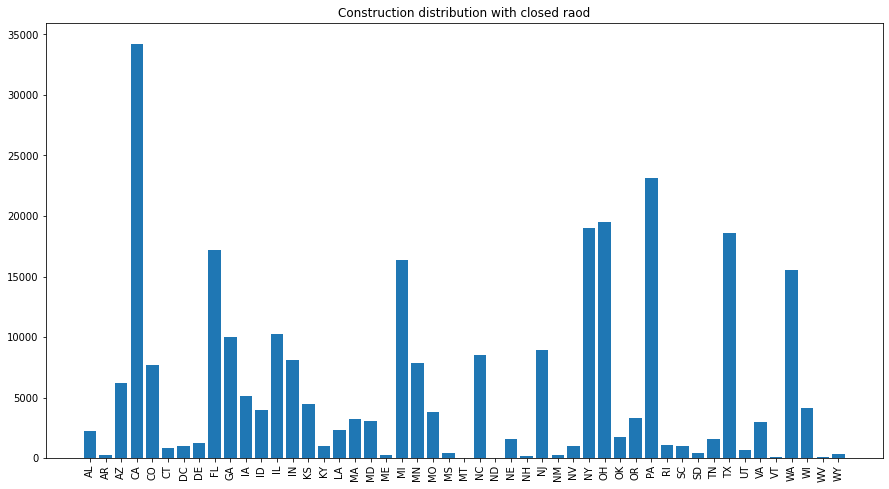

In [60]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_close_group_count_with_lock_road['State'], height=df_state_close_group_count_with_lock_road['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution with closed road")
plt.savefig("Construction-distribution-with-closed-road.png")

In [61]:
df_state_group = df.groupby(["State"])

In [62]:
df_state_group_count = df_state_group.size().reset_index(name='counts')

In [63]:
df_state_group_count.head()

,State,counts
0,AL,8922
1,AR,2552
2,AZ,28596
3,CA,257466
4,CO,104827


In [64]:
df_state_group_count['ST'] = df_state_group_count["State"]
df_state_group_count['totalCounts'] = df_state_group_count["counts"]
df_state_group_count = df_state_group_count.drop("counts", axis = 1)

In [65]:
df_state_group_count.head()

,State,ST,totalCounts
0,AL,AL,8922
1,AR,AR,2552
2,AZ,AZ,28596
3,CA,CA,257466
4,CO,CO,104827


In [66]:
df_state_close_group_count_no_lock_road_no_lane_Join = df_state_group_count.set_index('State').join(df_state_close_group_count_no_lock_road_no_lane.set_index('State'))

In [67]:
df_state_close_group_count_no_lock_road_no_lane_Join.head()

,ST,totalCounts,road_closure,lane_closure,counts
State,,,,,
AL,AL,8922,False,False,3491
AR,AR,2552,False,False,1100
AZ,AZ,28596,False,False,16671
CA,CA,257466,False,False,150555
CO,CO,104827,False,False,76787


In [68]:
df_state_close_group_count_no_lock_road_no_lane_Join["rate"] = df_state_close_group_count_no_lock_road_no_lane_Join["counts"] / df_state_close_group_count_no_lock_road_no_lane_Join["totalCounts"]

In [69]:
df_state_close_group_count_no_lock_road_no_lane_Join.head()

,ST,totalCounts,road_closure,lane_closure,counts,rate
State,,,,,,
AL,AL,8922,False,False,3491,0.391280
AR,AR,2552,False,False,1100,0.431034
AZ,AZ,28596,False,False,16671,0.582984
CA,CA,257466,False,False,150555,0.584757
CO,CO,104827,False,False,76787,0.732512


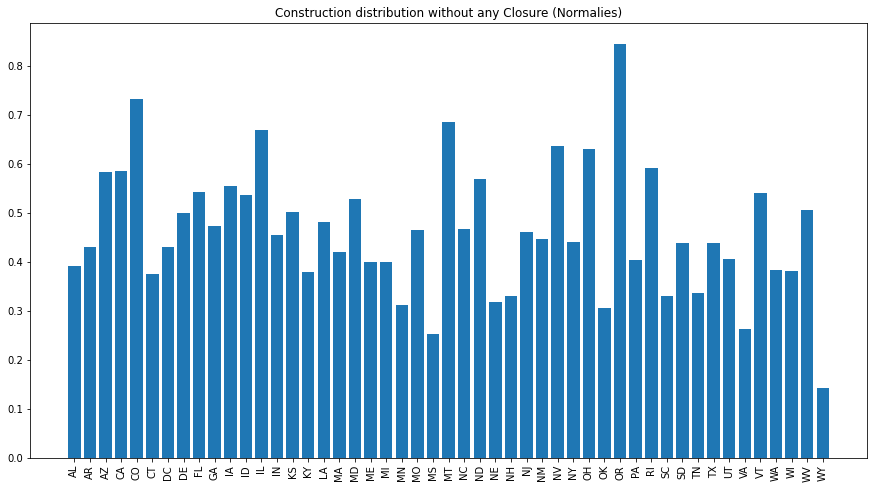

In [70]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_close_group_count_no_lock_road_no_lane_Join['ST'], height=df_state_close_group_count_no_lock_road_no_lane_Join['rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution without any Closure (Normalies)")
plt.savefig("Construction-distribution-without-any-Closure-Normalies.png")

In [72]:
df_state_group_count.head()

,State,ST,totalCounts
0,AL,AL,8922
1,AR,AR,2552
2,AZ,AZ,28596
3,CA,CA,257466
4,CO,CO,104827


In [73]:
df_state_close_group_count_no_lock_road_with_lane.head()

,State,road_closure,lane_closure,counts
1,AL,False,True,3157
4,AR,False,True,1187
7,AZ,False,True,5747
10,CA,False,True,72688
13,CO,False,True,20340


In [74]:
df_state_close_group_count_no_lock_road_with_lane_Join = df_state_group_count.set_index('State').join(df_state_close_group_count_no_lock_road_with_lane.set_index('State'))

In [75]:
df_state_close_group_count_no_lock_road_with_lane_Join.head()

,ST,totalCounts,road_closure,lane_closure,counts
State,,,,,
AL,AL,8922,False,True,3157
AR,AR,2552,False,True,1187
AZ,AZ,28596,False,True,5747
CA,CA,257466,False,True,72688
CO,CO,104827,False,True,20340


In [76]:
df_state_close_group_count_no_lock_road_with_lane_Join["rate"] = df_state_close_group_count_no_lock_road_with_lane_Join["counts"] / df_state_close_group_count_no_lock_road_with_lane_Join["totalCounts"]

In [77]:
df_state_close_group_count_no_lock_road_with_lane_Join.head()

,ST,totalCounts,road_closure,lane_closure,counts,rate
State,,,,,,
AL,AL,8922,False,True,3157,0.353844
AR,AR,2552,False,True,1187,0.465125
AZ,AZ,28596,False,True,5747,0.200972
CA,CA,257466,False,True,72688,0.282321
CO,CO,104827,False,True,20340,0.194034


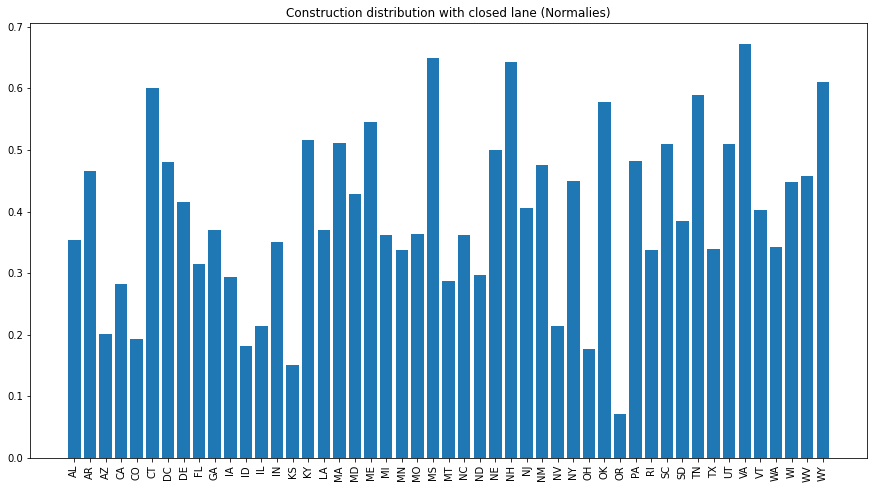

In [80]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_close_group_count_no_lock_road_with_lane_Join['ST'], height=df_state_close_group_count_no_lock_road_with_lane_Join[''])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution with closed lane (Normalies)")
plt.savefig("Construction-distribution-with-closed-lane-Normalies.png")

In [81]:
df_state_close_group_count_with_lock_road.head()

,State,road_closure,lane_closure,counts
2,AL,True,False,2274
5,AR,True,False,265
8,AZ,True,False,6178
11,CA,True,False,34223
14,CO,True,False,7700


In [82]:
df_state_group_count.head()

,State,ST,totalCounts
0,AL,AL,8922
1,AR,AR,2552
2,AZ,AZ,28596
3,CA,CA,257466
4,CO,CO,104827


In [83]:
df_state_close_group_count_with_lock_road_Join = df_state_group_count.set_index('State').join(df_state_close_group_count_with_lock_road.set_index('State'))

In [84]:
df_state_close_group_count_with_lock_road_Join.head()

,ST,totalCounts,road_closure,lane_closure,counts
State,,,,,
AL,AL,8922,True,False,2274
AR,AR,2552,True,False,265
AZ,AZ,28596,True,False,6178
CA,CA,257466,True,False,34223
CO,CO,104827,True,False,7700


In [85]:
df_state_close_group_count_with_lock_road_Join["rate"] = df_state_close_group_count_with_lock_road_Join["counts"] / df_state_close_group_count_with_lock_road_Join["totalCounts"]

In [86]:
df_state_close_group_count_with_lock_road_Join.head()

,ST,totalCounts,road_closure,lane_closure,counts,rate
State,,,,,,
AL,AL,8922,True,False,2274,0.254876
AR,AR,2552,True,False,265,0.103840
AZ,AZ,28596,True,False,6178,0.216044
CA,CA,257466,True,False,34223,0.132922
CO,CO,104827,True,False,7700,0.073454


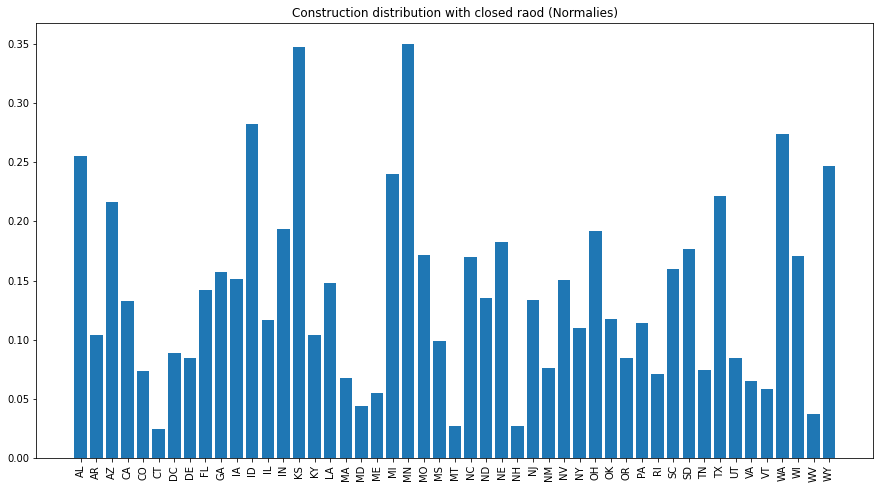

In [87]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_close_group_count_with_lock_road_Join['ST'], height=df_state_close_group_count_with_lock_road_Join['rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution with closed raod (Normalies)")
plt.savefig("Construction-distribution-with-closed-raod-Normalies.png")